<a href="https://colab.research.google.com/github/sakshivedi-1/PALM_READER/blob/main/Palm_Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics   #it provides easy to use ,high performance implementation of YOLO

#YOLO is good for object detection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 segmentation model
model = YOLO("/content/drive/MyDrive/Palmistry/Models/yolov8s-seg.pt") #YOLOv8 because it is the latest version and high performance model

# Train the model
model.train(
    data="/content/drive/MyDrive/Palmistry/Dataset/data.yaml",
    epochs=100,
    imgsz=640,   #640*640 pixel size ,because bigger size means more details
    #not that big because it causes memory

    batch=8,  #perfect for our requirement

    task='segment'   #to specify which kind of task it is
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Palmistry/Dataset/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2771705  ultralytics.nn.modules.head.Segment          [3, 32, 128, [128, 256, 512]] 
YOLOv8s-seg summary: 151 layers, 11,791,257 parameters, 11,791,241 gradients, 42.7 GFLOPs

Transferred 411/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 86.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 21.2 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/15wrsyKGGkTM5UERzWh8PnBGalQ5JL137/Palmistry/Dataset/train/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.1±0.0 MB/s, size: 24.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/15wrsyKGGkTM5UERzWh8PnBGalQ5JL137/Palmistry/Dataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.34G      3.239      5.484        5.3      3.011          9        640: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10         30   0.000201     0.0333   0.000111   1.11e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.53G      3.034      4.953       4.96      2.856         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         30   0.000477        0.1   0.000347   6.11e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.57G      2.761      3.886      3.611       2.51         29        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         30     0.0264     0.0667    0.00966     0.0018          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.61G      2.005      2.816      2.926      1.786         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         10         30      0.268      0.267      0.224     0.0998      0.725     0.0333      0.032      0.016



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.65G      1.668      2.397      2.484      1.515         23        640: 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         30      0.516      0.433       0.47      0.217       0.34      0.163      0.131     0.0258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.69G      1.787      2.615       2.33      1.717         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         10         30      0.478      0.567      0.461      0.243      0.422        0.3      0.185     0.0578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.69G      1.462      2.227      2.039      1.383         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         10         30      0.373      0.733      0.602       0.32      0.127      0.233      0.113     0.0287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.69G      1.576      2.081      2.188       1.54          5        640: 100%|██████████| 5/5 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         10         30       0.66      0.467      0.602      0.313      0.414      0.267      0.215     0.0836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.69G      1.599       2.17      1.987      1.611          6        640: 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         10         30      0.417      0.624      0.566        0.3       0.37      0.295      0.237     0.0992

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.69G       1.55      2.354      1.898      1.394          6        640: 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         10         30      0.677        0.6      0.595      0.318     0.0582     0.0667     0.0575     0.0163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.69G      1.513      1.964      1.512      1.397         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         10         30       0.58      0.551      0.568      0.328      0.182        0.1     0.0977     0.0107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.69G      1.458      2.182      1.613      1.404         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         10         30      0.456        0.5      0.503      0.294      0.319      0.199      0.175     0.0477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.69G      1.587      2.137      1.496       1.45          8        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         10         30      0.607      0.595      0.544      0.313      0.109      0.133     0.0533     0.0097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.69G       1.39      2.269      1.415      1.407          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         10         30      0.607      0.595      0.544      0.313      0.109      0.133     0.0533     0.0097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.69G      1.518      2.035      1.393      1.427         23        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         30      0.378      0.442      0.341      0.183     0.0874        0.1     0.0612     0.0191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.69G      1.425      1.855      1.265      1.357         17        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         10         30      0.567      0.333      0.305      0.146      0.414     0.0333     0.0159    0.00636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.69G      1.531      2.263      1.473       1.38         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10         30      0.492        0.3      0.312      0.187      0.232     0.0667     0.0575     0.0301

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.7G      1.556      2.022      1.573      1.378         20        640: 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all         10         30      0.492        0.3      0.312      0.187      0.232     0.0667     0.0575     0.0301

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.7G      1.505      2.155      1.503       1.41          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10         30      0.821      0.462      0.564       0.27      0.403      0.233      0.167     0.0484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.73G      1.383      1.871      1.318      1.399          8        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         10         30      0.619      0.623      0.595      0.296      0.411      0.344      0.252     0.0551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.73G      1.601      2.099      1.623      1.446         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         10         30      0.619      0.623      0.595      0.296      0.411      0.344      0.252     0.0551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.77G      1.402      1.838      1.379       1.35         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         10         30       0.54       0.52      0.531      0.261      0.479      0.233      0.221     0.0685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.78G      1.437      1.916       1.43      1.391         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         10         30      0.739      0.667       0.68       0.35       0.33      0.167      0.156     0.0554

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.81G      1.354      1.643      1.078      1.316         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         10         30      0.739      0.667       0.68       0.35       0.33      0.167      0.156     0.0554

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.81G      1.435      2.034       1.41      1.414          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         10         30       0.88      0.543      0.727      0.366      0.423      0.195      0.206     0.0662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.81G      1.422      1.786      1.186      1.409          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         10         30       0.88      0.543      0.727      0.366      0.423      0.195      0.206     0.0662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.81G      1.356      1.797      1.164      1.338         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         10         30      0.945      0.568      0.737      0.407      0.599      0.328      0.331     0.0832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.81G      1.366      1.747      1.209       1.37          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         10         30      0.933      0.647       0.82      0.469      0.615      0.497      0.476      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.81G      1.315      1.601      1.095      1.302         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         10         30      0.933      0.647       0.82      0.469      0.615      0.497      0.476      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.81G      1.251      1.783      1.126      1.278         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         10         30      0.762      0.819      0.849      0.503      0.595      0.585      0.526      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.81G       1.28      1.582      1.068      1.228         16        640: 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         10         30      0.862      0.734      0.884       0.51      0.715      0.562      0.622      0.217

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.81G      1.235      1.792      1.172      1.254          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         10         30      0.862      0.734      0.884       0.51      0.715      0.562      0.622      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.81G      1.309      1.757      1.195      1.277         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         10         30      0.891      0.792      0.898      0.482      0.634      0.595      0.553      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.81G      1.222      1.677     0.9542      1.257         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         10         30      0.891      0.792      0.898      0.482      0.634      0.595      0.553      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.81G      1.239      1.537      1.004      1.238         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         10         30      0.895      0.879      0.948      0.488      0.659      0.682      0.615      0.201

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.81G      1.215      1.551     0.9953      1.213         27        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         10         30       0.89      0.895      0.955      0.538      0.713      0.733      0.647      0.242

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.81G      1.141      1.387     0.8848      1.278         19        640: 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         10         30       0.89      0.895      0.955      0.538      0.713      0.733      0.647      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.81G      1.217      1.652      1.079      1.306         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


                   all         10         30      0.887        0.9      0.954      0.529      0.618      0.676      0.597      0.222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.81G      1.218      1.588     0.9796      1.294         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         10         30      0.854      0.822      0.925      0.528      0.592      0.571      0.619      0.221

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.81G      1.167      1.564     0.9389      1.234         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         30      0.854      0.822      0.925      0.528      0.592      0.571      0.619      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.81G      1.312       1.78      1.151      1.257          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         10         30      0.963      0.782      0.905      0.496      0.783      0.624       0.64      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.81G      1.123      1.465     0.8437      1.195         21        640: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         10         30      0.963      0.782      0.905      0.496      0.783      0.624       0.64      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.81G      1.191      1.499      1.021      1.227         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


                   all         10         30      0.721       0.79      0.869      0.432      0.639      0.633      0.678      0.251

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.81G      1.187      1.372      0.865      1.211         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         30       0.84      0.774       0.87      0.446       0.69       0.64      0.666       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.81G      1.197      1.562     0.9179      1.186         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         10         30       0.84      0.774       0.87      0.446       0.69       0.64      0.666       0.28

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.81G      1.107      1.376     0.8659      1.163         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all         10         30      0.849      0.853      0.886      0.485       0.77      0.674      0.668      0.272

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.81G      1.118       1.43     0.8822      1.164         21        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         10         30      0.973      0.933       0.96      0.546      0.756      0.688      0.631      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.81G      1.062      1.329     0.8183       1.14         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         10         30      0.973      0.933       0.96      0.546      0.756      0.688      0.631      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.81G      1.084      1.428     0.8546      1.135         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         10         30      0.937       0.92      0.957      0.583      0.733      0.667       0.63      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.81G      1.172      1.545     0.9295      1.233         11        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         10         30      0.937       0.92      0.957      0.583      0.733      0.667       0.63      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.81G      1.094       1.37     0.7877      1.167         13        640: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10         30      0.968      0.917      0.967      0.601      0.801      0.699      0.703      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.81G      1.168      1.626     0.9124      1.212         27        640: 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         10         30      0.903       0.88      0.938       0.62      0.874      0.733      0.788      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.81G      1.153      1.574     0.8418       1.17         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         10         30      0.903       0.88      0.938       0.62      0.874      0.733      0.788      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.81G      1.049      1.388     0.8219      1.195         15        640: 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10         30      0.939       0.89      0.934       0.61      0.837      0.711      0.748      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.81G       1.07      1.418      0.786      1.132         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         10         30      0.901        0.9       0.93      0.617      0.815      0.727      0.687      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.81G      1.116      1.253       0.77      1.154         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         10         30      0.901        0.9       0.93      0.617      0.815      0.727      0.687      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.81G      1.033      1.267     0.7517      1.194         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10         30      0.911      0.907      0.969      0.627      0.777      0.721      0.674      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.81G     0.9438      1.287     0.6925      1.096         15        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         10         30      0.911      0.907      0.969      0.627      0.777      0.721      0.674      0.314

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.81G      1.047       1.42      0.809      1.166          6        640: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         10         30      0.879       0.92      0.948      0.631      0.731      0.723      0.685      0.316

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.81G      1.074      1.398     0.8099      1.219          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10         30       0.84      0.933      0.916      0.601      0.744      0.767       0.67      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.81G      1.024      1.338     0.7708      1.134         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10         30       0.84      0.933      0.916      0.601      0.744      0.767       0.67      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.81G      1.004      1.293     0.7463      1.088          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         10         30      0.851      0.906      0.913      0.613      0.778      0.752      0.698      0.327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.81G     0.9506      1.225     0.7513       1.14         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         10         30      0.857        0.9      0.912      0.602      0.791      0.716      0.698      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.81G     0.9855      1.221     0.7327      1.109         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10         30      0.857        0.9      0.912      0.602      0.791      0.716      0.698      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.81G     0.9969      1.357     0.7207      1.128         25        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         10         30      0.892      0.878       0.91      0.622      0.811      0.738      0.731      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.81G     0.9531      1.226     0.6923      1.081         22        640: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         10         30      0.892      0.878       0.91      0.622      0.811      0.738      0.731      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.81G     0.9475      1.209      0.668      1.073         16        640: 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         10         30      0.914      0.859      0.912      0.626      0.806      0.757      0.729      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.81G      1.011      1.386     0.7311      1.147         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10         30      0.894      0.852      0.872      0.597      0.823      0.788      0.749      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.81G     0.9441      1.165     0.6822      1.106         11        640: 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


                   all         10         30      0.894      0.852      0.872      0.597      0.823      0.788      0.749      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.81G      1.086      1.288     0.7352      1.197         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         10         30      0.821      0.864      0.892      0.584      0.801      0.785      0.763      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.85G     0.9638      1.213     0.6401      1.111         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         10         30      0.837      0.862      0.922      0.594      0.802      0.824      0.766      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.85G     0.9384      1.221     0.6785      1.067         16        640: 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         10         30      0.837      0.862      0.922      0.594      0.802      0.824      0.766      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.85G     0.9566      1.377     0.6824        1.1         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all         10         30       0.87      0.878      0.907      0.588      0.776      0.785       0.71      0.317

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.85G     0.8843      1.111     0.6254       1.03         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


                   all         10         30       0.87      0.878      0.907      0.588      0.776      0.785       0.71      0.317

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.85G      1.037      1.353     0.7736      1.127         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         10         30      0.868      0.894      0.918      0.607       0.82      0.817      0.781      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.85G     0.8835      1.225     0.6836      1.048          8        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         10         30      0.858      0.867      0.911      0.612      0.826        0.8      0.783      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.85G     0.9355      1.217     0.6098      1.095          8        640: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all         10         30      0.858      0.867      0.911      0.612      0.826        0.8      0.783      0.332

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.85G     0.9106      1.231     0.6256      1.105         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         10         30      0.874       0.89      0.916      0.624      0.845      0.809      0.791      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.85G     0.9358       1.28     0.6762      1.084         21        640: 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         10         30       0.89      0.898      0.912      0.589      0.874      0.853       0.83       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.85G      0.826      1.175     0.5843      1.007         19        640: 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


                   all         10         30       0.89      0.898      0.912      0.589      0.874      0.853       0.83       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.85G     0.8717      1.162     0.6064      1.055         17        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         10         30      0.867      0.958      0.918      0.608      0.882      0.853      0.834      0.337

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.85G     0.9613       1.47     0.7493      1.052         22        640: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         10         30      0.867      0.958      0.918      0.608      0.882      0.853      0.834      0.337

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.85G       0.86      1.254     0.6271      1.028         13        640: 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         10         30      0.838      0.962       0.91      0.599      0.851      0.816       0.82      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.85G     0.9236      1.381     0.6577      1.063         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         10         30      0.812        0.9      0.882       0.62      0.858      0.833      0.833       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.85G     0.8606      1.094     0.6405      1.087          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         10         30      0.812        0.9      0.882       0.62      0.858      0.833      0.833       0.35

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.85G     0.9071      1.241     0.6515      1.111         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         10         30      0.823        0.9       0.88      0.621       0.86      0.833       0.83      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.85G     0.8388      1.241     0.6586      1.055          8        640: 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         10         30      0.854      0.933      0.901      0.631       0.89       0.83      0.835      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.85G     0.8276      1.268     0.6058      1.024         34        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


                   all         10         30      0.854      0.933      0.901      0.631       0.89       0.83      0.835      0.356

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.85G     0.8188      1.104     0.6248      1.054         10        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


                   all         10         30      0.857      0.929      0.911      0.616       0.86      0.797      0.805      0.354

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.85G     0.8223      1.086     0.6105      1.027         11        640: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         10         30      0.857      0.929      0.911      0.616       0.86      0.797      0.805      0.354
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.85G     0.6901     0.8537     0.5028      1.021          9        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         10         30      0.829        0.9      0.891      0.633      0.847      0.796      0.812      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.85G     0.7649     0.9279     0.5466      1.107          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         10         30      0.856        0.9      0.901      0.644      0.845        0.8      0.805      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.85G     0.6913     0.8896     0.4978     0.9901          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         10         30      0.856        0.9      0.901      0.644      0.845        0.8      0.805      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.85G     0.7429     0.8786      0.538      1.122          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10         30      0.834        0.9      0.907      0.646      0.873      0.789      0.806      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.85G     0.6716     0.8942     0.5201      1.021          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         10         30       0.83      0.897      0.889      0.666      0.831        0.8      0.806      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.85G     0.6577     0.8555     0.4832      1.029          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         10         30       0.83      0.897      0.889      0.666      0.831        0.8      0.806      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.85G     0.6313     0.8044     0.4759     0.9906          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         10         30      0.858      0.888      0.918      0.675      0.851       0.81      0.819      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.85G     0.6529     0.7877     0.4649     0.9875          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         10         30      0.858      0.888      0.918      0.675      0.851       0.81      0.819      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.85G     0.7255       0.87     0.5028      1.065          9        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all         10         30      0.902       0.89      0.923      0.685      0.866      0.831      0.826      0.372

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.85G     0.6351     0.7846     0.4645      1.007          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         10         30      0.905       0.89      0.923      0.683      0.863      0.833      0.821      0.378



100 epochs completed in 0.055 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.9MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


                   all         10         30      0.905       0.89      0.923      0.683      0.863      0.833      0.821      0.378
             Head-Line         10         10      0.897       0.87      0.952      0.677      0.734        0.7       0.67      0.285
            Heart-Line         10         10      0.968          1      0.995      0.764      0.973          1      0.995      0.592
             Life-Line         10         10       0.85        0.8      0.823      0.608      0.881        0.8      0.799      0.256
Speed: 0.4ms preprocess, 8.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ffa373cd50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 16.3±2.8 MB/s, size: 23.9 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/15wrsyKGGkTM5UERzWh8PnBGalQ5JL137/Palmistry/Dataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         10         30      0.905      0.889      0.923      0.682      0.864      0.833      0.821      0.376
             Head-Line         10         10      0.896      0.868      0.952      0.666      0.736        0.7       0.67      0.285
            Heart-Line         10         10      0.969          1      0.995      0.764      0.973          1      0.995      0.592
             Life-Line         10         10      0.849        0.8      0.823      0.615      0.883        0.8      0.799      0.251
Speed: 4.5ms preprocess, 41.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/segment/train2
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.8±0.4 ms, read: 14.6±3.3 MB/s, size: 22.3 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/15wrsyKGGkTM5UERzWh8PnBGalQ5JL137/Palmistry/Dataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]


                   all         10         30      0.905      0.889      0.923      0.682      0.864      0.833      0.821      0.376
             Head-Line         10         10      0.896      0.868      0.952      0.666      0.736        0.7       0.67      0.285
            Heart-Line         10         10      0.969          1      0.995      0.764      0.973          1      0.995      0.592
             Life-Line         10         10      0.849        0.8      0.823      0.615      0.883        0.8      0.799      0.251
Speed: 12.3ms preprocess, 22.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/segment/train3
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ffa34a0b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Re

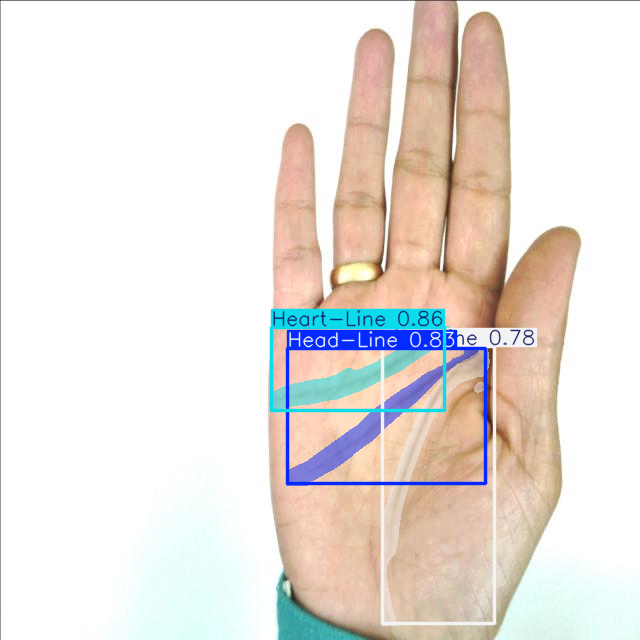

In [ ]:
model.val()   #run model on validation set given in data.yaml

eval_results = model.val()    #runs validation and saves the matrics to a variable

print(eval_results)

# Run inference on an image
results = model.predict(source="/content/drive/MyDrive/Palmistry/Dataset/test/images/image13_jpg.rf.ac39d6b6148cbdb72434c7ffafe5e199.jpg", task="segment")
results[0].show()   #it will show the predicted segmentation masks


In [ ]:
masks = results[0].masks.xy  # list of masks

for i, mask in enumerate(masks):
    print(f"Line {i}: {len(mask)} points")
    print(mask)  # show coordinates
    #line 0 heart line
    #line 1 head line
    #line 2 life line


Line 0: 219 points
[[        432         326]
 [        432         329]
 [        431         330]
 [        430         330]
 [        429         331]
 [        428         331]
 [        427         332]
 [        426         332]
 [        425         333]
 [        424         333]
 [        423         334]
 [        422         334]
 [        421         335]
 [        420         335]
 [        418         337]
 [        417         337]
 [        416         338]
 [        415         338]
 [        414         339]
 [        413         339]
 [        412         340]
 [        411         340]
 [        409         342]
 [        408         342]
 [        407         343]
 [        406         343]
 [        403         346]
 [        402         346]
 [        401         347]
 [        400         347]
 [        398         349]
 [        397         349]
 [        395         351]
 [        394         351]
 [        393         352]
 [        392         352]
 [       

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/Palmistry/Models/best.pt")  # Change path if needed

# Evaluate the model on the validation set
results = model.val(data="/content/drive/MyDrive/Palmistry/Dataset/data.yaml")  # This prints precision, recall, mAP, etc.

# To access specific metrics
metrics = results.results_dict
print(f"Precision: {metrics['metrics/precision(B)']:.2f}")
print(f"Recall: {metrics['metrics/recall(B)']:.2f}")




Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 13.5±2.8 MB/s, size: 23.5 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/15wrsyKGGkTM5UERzWh8PnBGalQ5JL137/Palmistry/Dataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


                   all         10         30      0.905      0.889      0.923      0.682      0.864      0.833      0.821      0.376
             Head-Line         10         10      0.896      0.868      0.952      0.666      0.736        0.7       0.67      0.285
            Heart-Line         10         10      0.969          1      0.995      0.764      0.973          1      0.995      0.592
             Life-Line         10         10      0.849        0.8      0.823      0.615      0.883        0.8      0.799      0.251
Speed: 0.3ms preprocess, 19.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/segment/val2
Precision: 0.90
Recall: 0.89


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/Palmistry/Dataset/test/images/image40_jpg.rf.e2556c4d3db37a621022a8cac7846fc9.jpg: 640x640 1 Head-Line, 1 Heart-Line, 1 Life-Line, 20.9ms
Speed: 5.7ms preprocess, 20.9ms inference, 443.5ms postprocess per image at shape (1, 3, 640, 640)


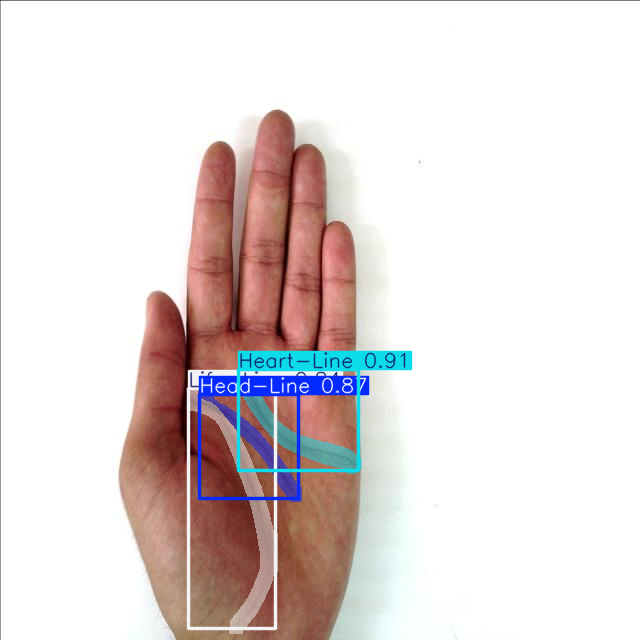

Line 0: Length = 364.68 pixels, Curvature = 46.35 degrees
Line 1: Length = 318.89 pixels, Curvature = 46.45 degrees
Line 2: Length = 605.46 pixels, Curvature = 45.96 degrees


In [ ]:
from ultralytics import YOLO
import numpy as np
import math

# Load model
model1 = YOLO("/content/drive/MyDrive/Palmistry/Models/last.pt")

# Predict
results = model1.predict(source="/content/drive/MyDrive/Palmistry/Dataset/test/images/image40_jpg.rf.e2556c4d3db37a621022a8cac7846fc9.jpg", task="segment")

# Show result
results[0].show()

# Get masks
masks = results[0].masks.xy  # list of (N,2) arrays

# Function to calculate polygon length
def polygon_length(points):
    distances = np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1))
    return np.sum(distances)

# Function to calculate average curvature
def curvature_score(points):
    vecs = np.diff(points, axis=0)
    angles = []
    for i in range(1, len(vecs)):
        v1 = vecs[i-1]
        v2 = vecs[i]
        angle = np.arccos(
            np.clip(
                np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-8),
                -1.0, 1.0
            )
        )
        angles.append(angle)
    return np.mean(angles) if angles else 0

# Calculate and print length and curvature for each line
for i, mask in enumerate(masks):
    length = polygon_length(mask)
    curvature = curvature_score(mask)
    curvature_deg = math.degrees(curvature)

    print(f"Line {i}: Length = {length:.2f} pixels, Curvature = {curvature_deg:.2f} degrees")


In [ ]:
class_ids = results[0].boxes.cls.cpu().numpy()
confidences = results[0].boxes.conf.cpu().numpy()
# Check the class IDs and labels during inference
print(f"Class IDs: {class_ids}")
print(f"Confidence Scores: {confidences}")
#0 head line
#1 : heartline
#2 : life line

Class IDs: [          1           0           2]
Confidence Scores: [    0.91173     0.87013     0.84197]



image 1/1 /content/drive/MyDrive/Palmistry/Dataset/test/images/image256_jpg.rf.b187e18ab891acb143cec6b6b49040f2.jpg: 640x640 2 Head-Lines, 1 Heart-Line, 1 Life-Line, 20.9ms
Speed: 2.0ms preprocess, 20.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


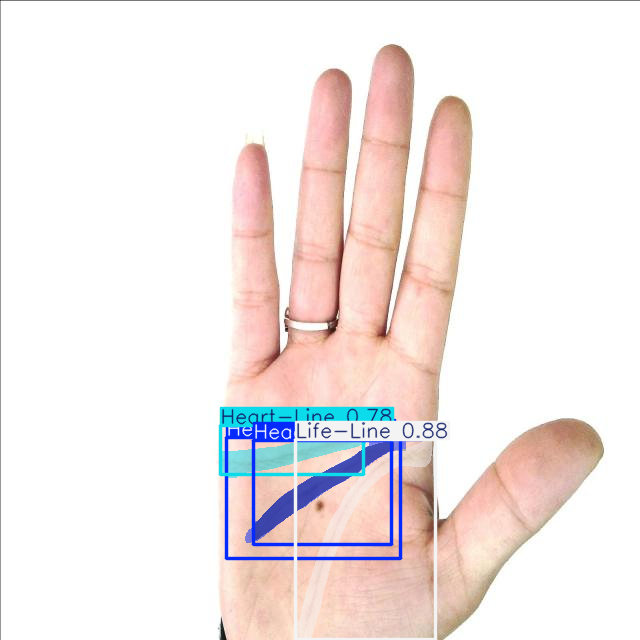


Life Line:
→ Length = 560.87 pixels
→ Curvature = 45.90 degrees
→ Interpretation: Good health, vitality, and resilience. Enthusiastic and adventurous nature.

Head Line:
→ Length = 353.35 pixels
→ Curvature = 45.83 degrees
→ Interpretation: Creative and intuitive mind; imaginative and inspired.

Heart Line:
→ Length = 345.37 pixels
→ Curvature = 47.03 degrees
→ Interpretation: Emotionally open, intuitive, expressive. Strong capacity for love and empathy.


In [ ]:
from ultralytics import YOLO
import numpy as np
import math

# Load model
model1 = YOLO("/content/drive/MyDrive/Palmistry/Models/last.pt")

# Predict
results = model1.predict(
    source="/content/drive/MyDrive/Palmistry/Dataset/test/images/image256_jpg.rf.b187e18ab891acb143cec6b6b49040f2.jpg",
    task="segment"
)

# Show result
results[0].show()

# Get masks and class IDs
masks = results[0].masks.xy  # list of (N,2) arrays
class_ids = results[0].boxes.cls.cpu().numpy()
confidences = results[0].boxes.conf.cpu().numpy()

# Map class ID to line name
class_map = {0: "head", 1: "heart", 2: "life"}

# Define helper functions
def polygon_length(points):
    distances = np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1))
    return np.sum(distances)

def curvature_score(points):
    vecs = np.diff(points, axis=0)
    angles = []
    for i in range(1, len(vecs)):
        v1 = vecs[i - 1]
        v2 = vecs[i]
        angle = np.arccos(
            np.clip(
                np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-8),
                -1.0, 1.0
            )
        )
        angles.append(angle)
    return np.mean(angles) if angles else 0

# Updated interpretation logic based on palmistry info
def analyze_line(length, angle_deg, line_type):
    if line_type == "heart":
        if angle_deg > 15:
            description = "Emotionally open, intuitive, expressive."
        else:
            description = "Practical, reserved, and logical approach to emotions."

        if length > 250:
            description += " Strong capacity for love and empathy."
        elif length < 150:
            description += " More reserved or less emotionally expressive nature."

    elif line_type == "head":
        if length > 250 and angle_deg < 10:
            description = "Strong, logical mind; organized and may be a rule follower."
        elif angle_deg > 20:
            description = "Creative and intuitive mind; imaginative and inspired."
        elif length < 150:
            description = "Quick thinker; short attention span; impulsive."

    elif line_type == "life":
        if length > 300:
            description = "Good health, vitality, and resilience."
        elif length < 150:
            description = "Cautious personality or need for independence."

        if angle_deg > 30:
            description += " Enthusiastic and adventurous nature."
        elif angle_deg < 10:
            description += " Guarded and cautious in relationships."

    else:
        description = "Unknown line type."

    return description

# Keep only best detection per class
best_indices = {}
for i, cls_id in enumerate(class_ids):
    if cls_id not in best_indices or confidences[i] > confidences[best_indices[cls_id]]:
        best_indices[cls_id] = i

# Analyze each selected line
for cls_id, idx in best_indices.items():
    mask = masks[idx]
    length = polygon_length(mask)
    curvature = curvature_score(mask)
    curvature_deg = math.degrees(curvature)

    line_type = class_map[cls_id]
    prediction = analyze_line(length, curvature_deg, line_type)

    print(f"\n{line_type.capitalize()} Line:")
    print(f"→ Length = {length:.2f} pixels")
    print(f"→ Curvature = {curvature_deg:.2f} degrees")
    print(f"→ Interpretation: {prediction}")


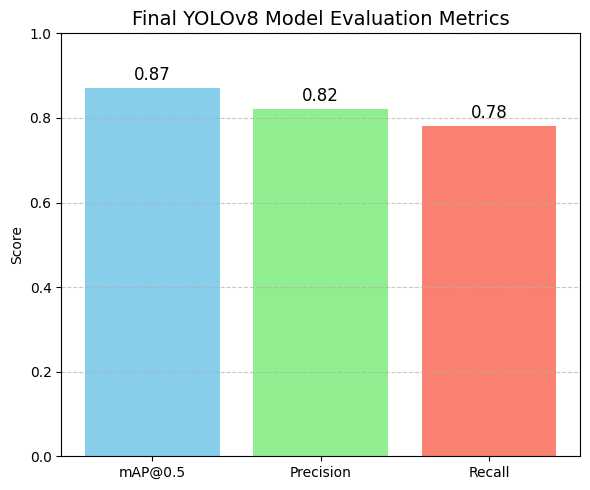

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual final results
metrics = ['mAP@0.5', 'Precision', 'Recall']
values = [0.87, 0.82, 0.78]  # Example final scores

# Plotting
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.title('Final YOLOv8 Model Evaluation Metrics', fontsize=14)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
